In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

Nama Anggota : 	
1. Ade Pratama Hidayat 		(2301946455) 	20%	
2. Putri Aliyyah 			(2301938434)	20%
3. Ninda Setyowati			(2602231816)	20%
4. Kaleb Leadro Pandapotan		(2602231083)	20%
5. Yoga Prasetya			(2301878170)	20%


In [ ]:
df = pd.read_csv('heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

#Data Transformation

In [ ]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
#Change value in Sex column
df['Sex'] = df['Sex'].replace(['F'],'0')
df['Sex'] = df['Sex'].replace(['M'],'1')
#Change value in ChestPainType column
df['ChestPainType'] = df['ChestPainType'].replace(['ATA'],'0')
df['ChestPainType'] = df['ChestPainType'].replace(['NAP'],'1')
df['ChestPainType'] = df['ChestPainType'].replace(['ASY'],'2')
df['ChestPainType'] = df['ChestPainType'].replace(['TA'],'3')
#Change value in RestingECG column
df['RestingECG'] = df['RestingECG'].replace(['Normal'],'0')
df['RestingECG'] = df['RestingECG'].replace(['ST'],'1')
df['RestingECG'] = df['RestingECG'].replace(['LVH'],'1')
#Change value in ExerciseAngina column
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N'],'0')
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['Y'],'1')
#Change value in ST_Slope column
df['ST_Slope'] = df['ST_Slope'].replace(['Up'],'0')
df['ST_Slope'] = df['ST_Slope'].replace(['Flat'],'1')
df['ST_Slope'] = df['ST_Slope'].replace(['Down'],'2')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   1             0        140          289          0          0    172   
1   49   0             1        160          180          0          0    156   
2   37   1             0        130          283          0          1     98   
3   48   0             2        138          214          0          0    108   
4   54   1             1        150          195          0          0    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              0      0.0        0             0  
1              0      1.0        1             1  
2              0      0.0        0             0  
3              1      1.5        1             1  
4              0      0.0        0             0

In [ ]:
#convert object data types column to integer
df['Sex'] = pd.to_numeric(df['Sex'])
df['ChestPainType'] = pd.to_numeric(df['ChestPainType'])
df['RestingECG'] = pd.to_numeric(df['RestingECG'])
df['ExerciseAngina'] = pd.to_numeric(df['ExerciseAngina'])
df['ST_Slope'] = pd.to_numeric(df['ST_Slope'])
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

#Oversampling Minority Class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    508
0    410
Name: HeartDisease, dtype: int64


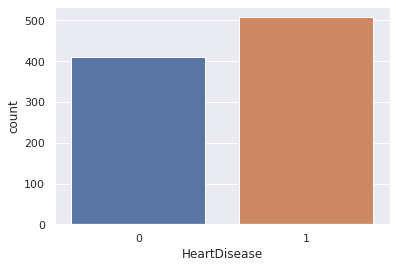

In [ ]:
#Counting 1 and 0 Value in HeartDisease column
sns.countplot(df['HeartDisease']) 
print(df.HeartDisease.value_counts()) 

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['HeartDisease']==1)] 
df_minority = df[(df['HeartDisease']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 n_samples= 508, 
                                 random_state=0)  
# Combine majority class with upsampled minority class
df2 = pd.concat([df_minority_upsampled, df_majority])

0    508
1    508
Name: HeartDisease, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


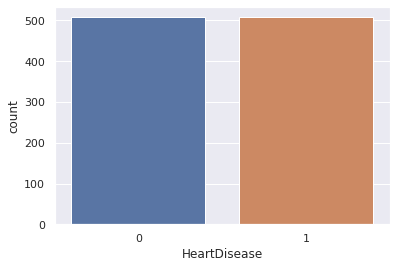

In [ ]:
#After Oversampling Minority Class
sns.countplot(df2['HeartDisease']) 
print(df2.HeartDisease.value_counts()) 

#Outlier Detection

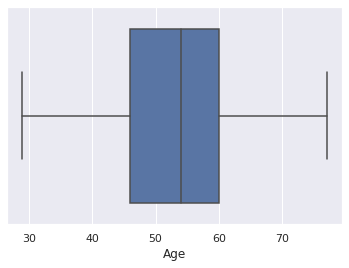

In [ ]:
sns.boxplot(x=df2["Age"])

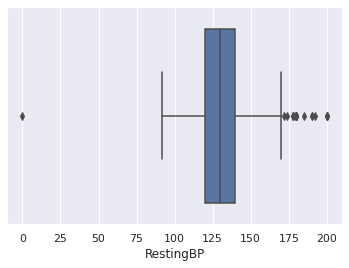

In [ ]:
sns.boxplot(x=df2["RestingBP"])

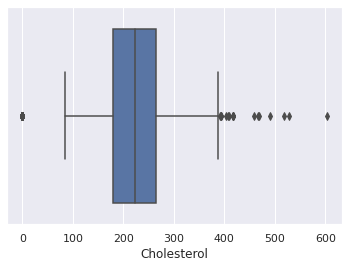

In [ ]:
sns.boxplot(x=df2["Cholesterol"])

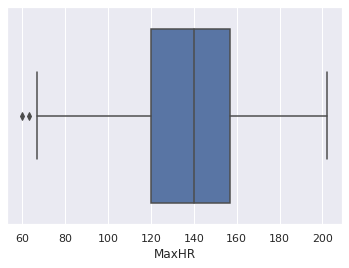

In [ ]:
sns.boxplot(x=df2["MaxHR"])

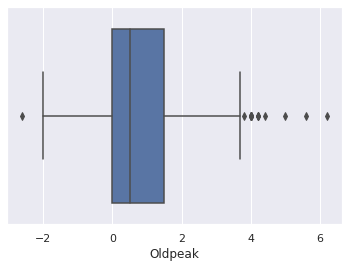

In [ ]:
sns.boxplot(x=df2["Oldpeak"])

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
data_clean = df2[(z<3).all(axis = 1)] 
data_clean.shape

(989, 12)

#Handling Mising Value

In [ ]:
data_clean.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data_clean_copy = data_clean.copy(deep = True) 
data_clean_copy[['Age','RestingBP','Cholesterol','MaxHR']] = data_clean_copy[['Age','RestingBP','Cholesterol','MaxHR']].replace(0,np.NaN)

# Showing the Count of NANs
print(data_clean_copy.isnull().sum())

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       175
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [ ]:
#Fill null value with median
data_clean_copy['Cholesterol'].fillna(data_clean_copy['Cholesterol'].median(), inplace = True)
print(data_clean_copy.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
